General Hypothesis re power usage ......from Aus market experience where solar/wind are increasingly dominating power generation market and causing rel problems in distribution network. So these need to be tested
1) Load variation largely driven by non commercial/household patterns  
2) High temperatures/airconditioning drives peak use/burnouts
3) Time critical ....power usage increases substantially when workers return home especially in summer because that whn a/c goes on
4) Higher spot prices impact commercial use more than domestic...but we dont have $price/mw 
5) Dont have customer split on commercial v non commercial customers 
Need to look at seasonal: temp v use both at total and say weekly slices

In [218]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

In [219]:
train = pd.read_pickle('train.pki')  #load previously created training data
print(train.head(2))

                           mw  temp  hour  dayofweek  month  year
date                                                             
2017-02-01 00:00:00  1419.881   NaN     0          2      2  2017
2017-02-01 01:00:00  1379.505  37.0     1          2      2  2017


Plot date: (mw, temp) highlights seasonal use suggests plausible
           summer height(temp:aircon?), winter mid use(temp:heating?) correlation

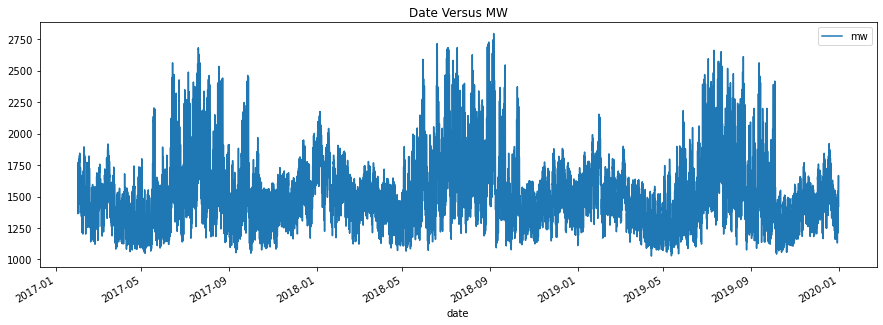

In [275]:
train.plot(kind='line',y='mw',title='Date Versus MW',figsize=(15, 5))  #index is used as default x axis
plt.show()

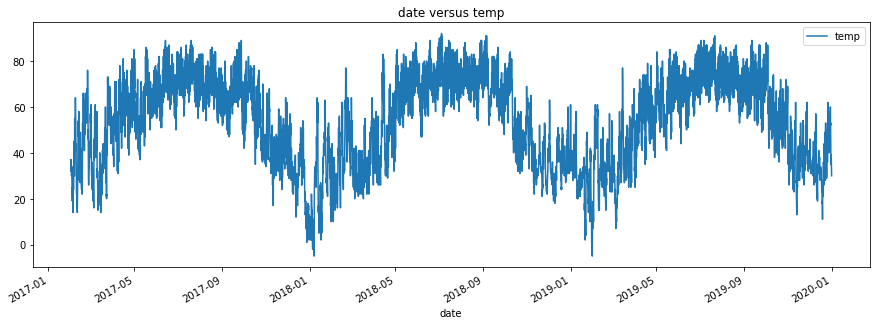

In [276]:
train.plot(kind='line',y='temp',title='date versus temp',figsize=(15, 5))  #index is used as default x axis
plt.show()

In [278]:
train_day_agg = train.groupby(['dayofweek','month','year']).agg(mw_median=('mw','median'),mw_max=('mw','max'),mw_sum=('mw','sum'))

Look at variation in daily use over set shows variation in days likely related to working week as well as temperature

In [279]:
print(train_day_agg.head(2))

                      mw_median    mw_max      mw_sum
dayofweek month year                                 
0         1     2018  1648.4025  1967.881  199590.301
                2019  1652.9030  1991.505  159009.563


<AxesSubplot:title={'center':'Power Variation by Day of week'}, xlabel='dayofweek,month,year'>

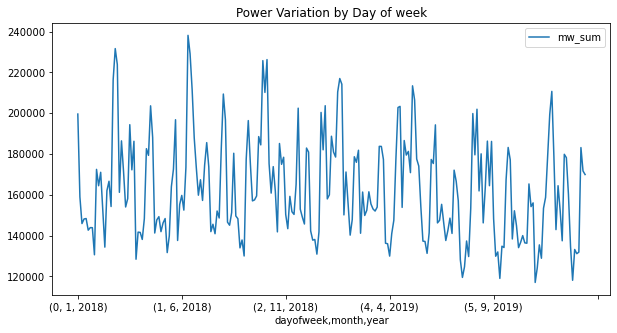

In [281]:
train_day_agg.dtypes
train_day_agg.plot(kind='line', y='mw_sum',title='Power Variation by Day of week',figsize=(10,5))

likewise looking at hour of day clearly indicates variation in keeping with hypothesis

In [283]:
train_day_agg = train.groupby(['hour','dayofweek','month','year']).agg(hour_median=('mw','median'),hour_max=('mw','max'),hour_min=('mw','min'))

<AxesSubplot:title={'center':'Power Variation by hour'}, xlabel='hour,dayofweek,month,year'>

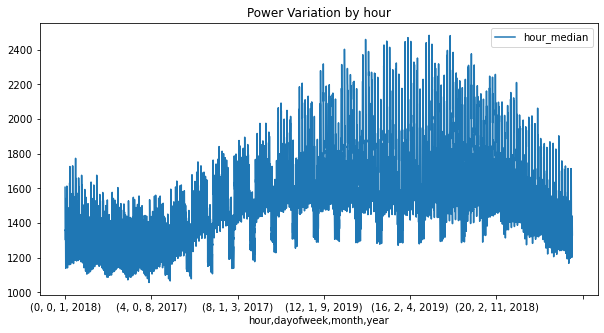

In [284]:
train_day_agg.plot(kind='line', y='hour_median',title='Power Variation by hour',figsize=(10,5))

Now lets look at useage/temperature for a week in each quarter and see how tempperature does/doesnot play a part in usage

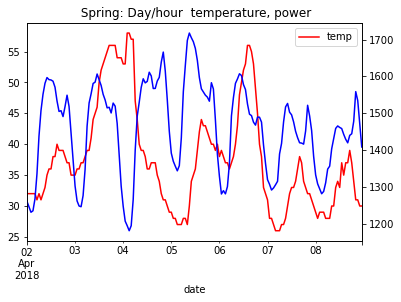

In [258]:
#Select 1st week in april  monday 2/4/2018
train_weekQ1=train.loc['2018-4-02':'2018-4-08']
fig, ax = plt.subplots()
train_weekQ1.temp.plot(ax=ax,style='r-')  #index is used as default x axis
train_weekQ1.mw.plot(ax=ax,style='b-', secondary_y=True)  #index is used as default x axis
plt.title(' Spring: Day/hour  temperature, power')
ax.legend()
plt.show() 



In [230]:
train_weekQ2=train.loc['2018-7-02':'2018-7-08'] #take a weeks slice in june and view correlation temp/mw

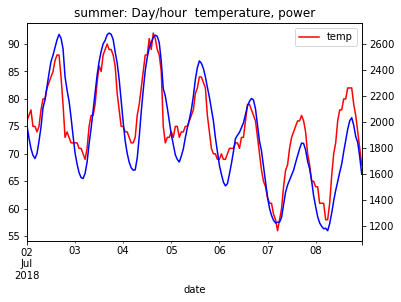

In [257]:
fig, ax = plt.subplots()

train_weekQ2.temp.plot(ax=ax,style='r-')  #index is used as default x axis
train_weekQ2.mw.plot(ax=ax,style='b-', secondary_y=True)  #index is used as default x axis
plt.title('summer: Day/hour  temperature, power')
ax.legend()
plt.show()

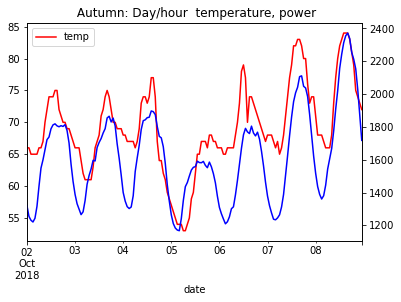

In [255]:
train_weekQ3=train.loc['2018-10-02':'2018-10-08']
fig, ax = plt.subplots()
train_weekQ3.temp.plot(ax=ax,style='r-')  #index is used as default x axis
train_weekQ3.mw.plot(ax=ax,style='b-', secondary_y=True)  #index is used as default x axis
plt.title(' Autumn: Day/hour  temperature, power')
ax.legend()
plt.show() 

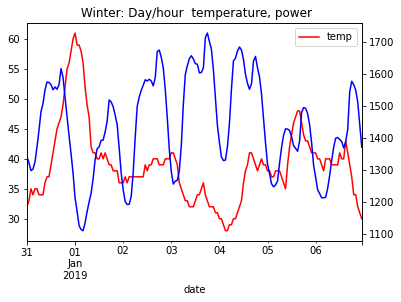

In [254]:
train_weekQ4=train.loc['2018-12-31':'2019-1-06']
fig, ax = plt.subplots()
train_weekQ4.temp.plot(ax=ax,style='r-')  #index is used as default x axis
train_weekQ4.mw.plot(ax=ax,style='b-', secondary_y=True)  #index is used as default x axis
plt.title(' Winter: Day/hour  temperature, power')
ax.legend()
plt.show() 

Summer, autumn aapparent close link between power use and temperature (over 60 degrees) Winter and Spring lower temperatures have distincly lower correlation. Doas influeceres raise question about validity of work/non work days but not time of day influence

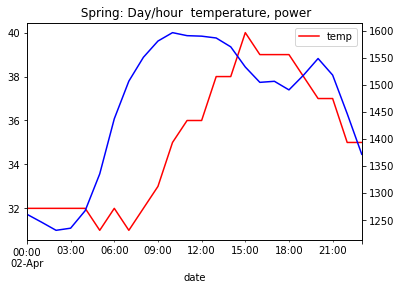

In [251]:
train_weekd1=train.loc['2018-4-02':'2018-4-02']
fig, ax = plt.subplots()
train_weekd1.temp.plot(ax=ax,style='r-')  #index is used as default x axis
train_weekd1.mw.plot(ax=ax,style='b-', secondary_y=True)  #index is used as default x axis
plt.title(' Spring: Day/hour  temperature, power')
ax.legend()
plt.show() 


                      hour_median  hour_max  hour_min  temp_max  temp_min
dayofweek month year                                                     
0         1     2018     1792.289  1967.881  1528.365      33.0       3.0
1         1     2018     1746.010  2095.842  1414.195      36.0       5.0


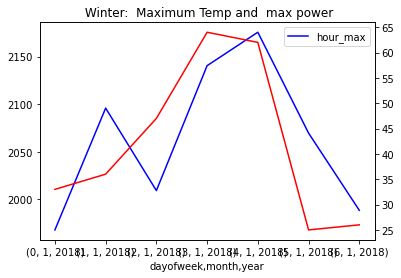

In [250]:
train_day_agg = train.loc['2018-01-01':'2018-01-14'].groupby(['dayofweek','month','year']).agg(hour_median=('mw','median'),hour_max=('mw','max'),hour_min=('mw','min'),temp_max=('temp','max'),temp_min=('temp','min'))
print(train_day_agg.head(2))
fig, ax = plt.subplots()
train_day_agg.hour_max.plot(ax=ax,style='b-')  #index is used as default x axis
train_day_agg.temp_max.plot(ax=ax,style='r-', secondary_y=True)  #index is used as default x axis
plt.title(' Winter:  Maximum Temp and  max power')
ax.legend()
plt.show() 

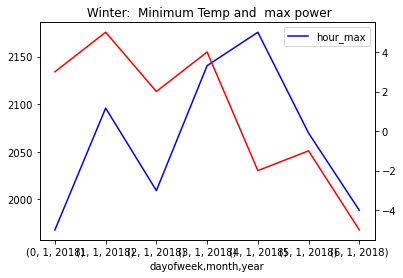

In [249]:
fig, ax = plt.subplots()
train_day_agg.hour_max.plot(ax=ax,style='b-')  #index is used as default x axis
train_day_agg.temp_min.plot(ax=ax,style='r-', secondary_y=True)  #index is used as default x axis
plt.title(' Winter:  Minimum Temp and  max power')
ax.legend()
plt.show() 

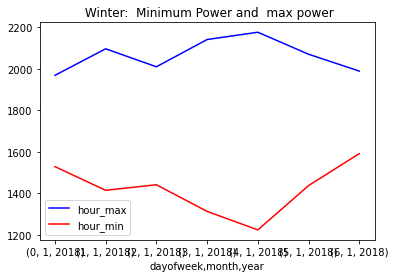

In [248]:
fig, ax = plt.subplots()
train_day_agg.hour_max.plot(ax=ax,style='b-')  #index is used as default x axis
train_day_agg.hour_min.plot(ax=ax,style='r-', secondary_y=False)  #index is used as default x axis
plt.title(' Winter:  Minimum Power and  max power')
ax.legend()
plt.show() 

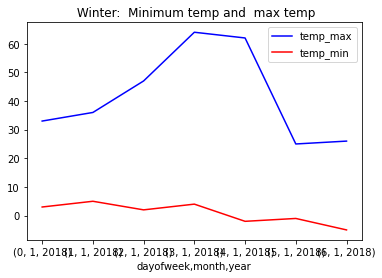

In [247]:
fig, ax = plt.subplots()
train_day_agg.temp_max.plot(ax=ax,style='b-')  #index is used as default x axis
train_day_agg.temp_min.plot(ax=ax,style='r-', secondary_y=False)  #index is used as default x axis
plt.title(' Winter:  Minimum temp and  max temp')
ax.legend()
plt.show() 

The daily variation in temperature is high in winter but the minimum is relatively constant during this period Power variation seems more related to max temperature rather than minimum (electricity not used for heating ??) There is arguably a constant minimum powerload  regardless of temperature/time of week and mximum doesnt vary that much over time

Determine  Correllation of temperature(temp) and Power(mw) indicates that not strongly correlated 
which gells with graphical evidence that high temp and time(day of week and hour) both influence power usage 

In [240]:
train[['temp','mw']].corr() 

,temp,mw
temp,1.000000,0.325756
mw,0.325756,1.000000


Scatter plot for temperature and power

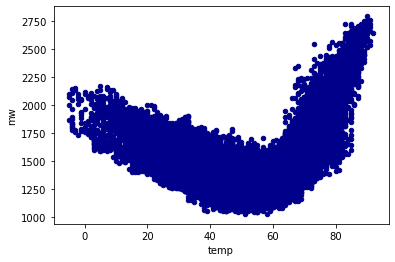

In [241]:
ax1 = train.plot.scatter(x='temp',

                      y='mw',

                      c='DarkBlue')

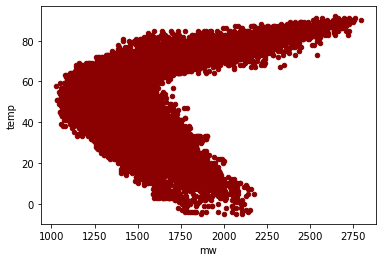

In [242]:
ax1 = train.plot.scatter(x='mw',

                      y='temp',

                      c='DarkRed')

So both these views suggest that high temperature(60F+)and below freezing (32F-) act to increase power use significantly.  